# **Coronary Heart Disease Classification**

# INTRODUCTION

Coronary Heart Disease (CHD) remains a critical global health concern, responsible for a substantial portion of cardiovascular-related morbidity and mortality. Identifying individuals at risk of developing CHD is paramount for timely intervention and prevention efforts. This project aims to harness the power of data analysis and predictive modeling to better understand the factors associated with Ten-Year CHD risk and to build a reliable predictive model.



**# importing necessary libraries**

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
!pip install imblearn

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [7]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

#Data Analysis
import pandas as pd
import numpy as np


#Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.express as px
import plotly.graph_objs as go


#Pre processing / Feature Engineering
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectFromModel


#Machine Learning
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn import model_selection
from sklearn.utils import class_weight
from xgboost import XGBClassifier

#Evaluating algorithms
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

#Dealing with imbalanced dataset
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

**# Loading and Exploring the Dataset**


In [8]:
df=pd.read_csv("/content/data_cardiovascular_risk.csv")

In [9]:
# First five rows
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [10]:
# checking random rows
df.sample(5)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
2549,2549,44,1.0,F,YES,8.0,0.0,0,0,0,351.0,106.0,65.0,25.34,95.0,69.0,0
3290,3290,67,1.0,F,NO,0.0,0.0,0,1,0,NaN,173.0,100.0,33.60,60.0,NaN,0
2977,2977,43,4.0,F,YES,9.0,0.0,0,0,0,207.0,95.5,70.0,19.78,93.0,79.0,0
3327,3327,45,1.0,M,NO,0.0,0.0,0,0,0,275.0,105.0,86.0,32.92,75.0,92.0,0
216,216,39,1.0,F,YES,10.0,0.0,0,0,0,226.0,95.0,59.0,22.88,80.0,83.0,0


In [11]:
# information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

# **Data Preprocessing**

# **Checking for Missing Values**

In [12]:
missing_data=df.isnull().sum()
print("\nMissing data:")
print(missing_data)
total_percentage=(missing_data.sum()/df.shape[0])*100
print(f"The total percentage of missing data is {round(total_percentage,2)}%")


Missing data:
id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64
The total percentage of missing data is 15.04%


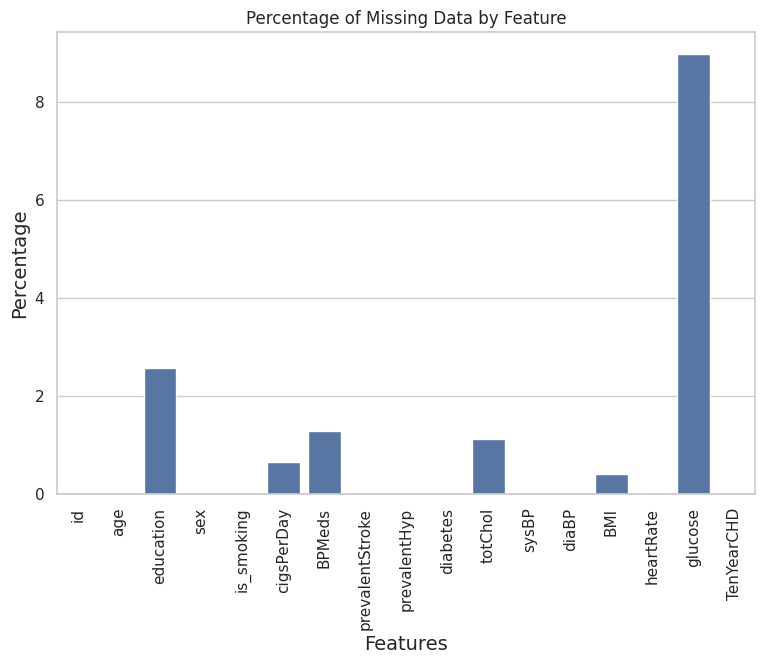

In [13]:
# Calculate the percentage of missing data for each feature
missing_data = missing_data.to_frame(name='Total')  # Convert Series to DataFrame
missing_data['Percentage'] = (missing_data['Total'] / len(df)) * 100

# Create a bar plot to visualize the percentage of missing data by feature
plt.figure(figsize=(9, 6))
sns.set(style="whitegrid")
sns.barplot(x=missing_data.index, y=missing_data['Percentage'], data=missing_data)
plt.title("Percentage of Missing Data by Feature")
plt.xlabel("Features", fontsize=14)
plt.ylabel("Percentage", fontsize=14)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

In [14]:
# Drop missing values
df.dropna(axis=0,inplace=True)

In [15]:
df.shape

(2927, 17)

In [16]:
df["age"].unique

<bound method Series.unique of 1       36
2       46
3       50
4       64
5       61
        ..
3384    61
3385    60
3386    46
3387    44
3389    54
Name: age, Length: 2927, dtype: int64>

In [17]:

df["age"].min()

32

In [18]:
df["age"].max()

70

In [19]:
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [20]:
categorical_features=['sex','education','is_smoking','BPMeds','prevalentStroke','prevalentHyp','diabetes']

In [21]:
for feature in categorical_features:
  print(feature,":")
  print(df[feature].value_counts())
  print("------------------")

sex :
sex
F    1620
M    1307
Name: count, dtype: int64
------------------
education :
education
1.0    1240
2.0     874
3.0     487
4.0     326
Name: count, dtype: int64
------------------
is_smoking :
is_smoking
NO     1480
YES    1447
Name: count, dtype: int64
------------------
BPMeds :
BPMeds
0.0    2839
1.0      88
Name: count, dtype: int64
------------------
prevalentStroke :
prevalentStroke
0    2909
1      18
Name: count, dtype: int64
------------------
prevalentHyp :
prevalentHyp
0    2007
1     920
Name: count, dtype: int64
------------------
diabetes :
diabetes
0    2848
1      79
Name: count, dtype: int64
------------------


In [22]:
# Now for the continuous variables
numeric_features=["age","cigsPerDay","totChol","sysBP","diaBP","BMI","heartRate","glucose"]


# **Exploratory Data** **Analysis**

## **Univariant** **Analysis**

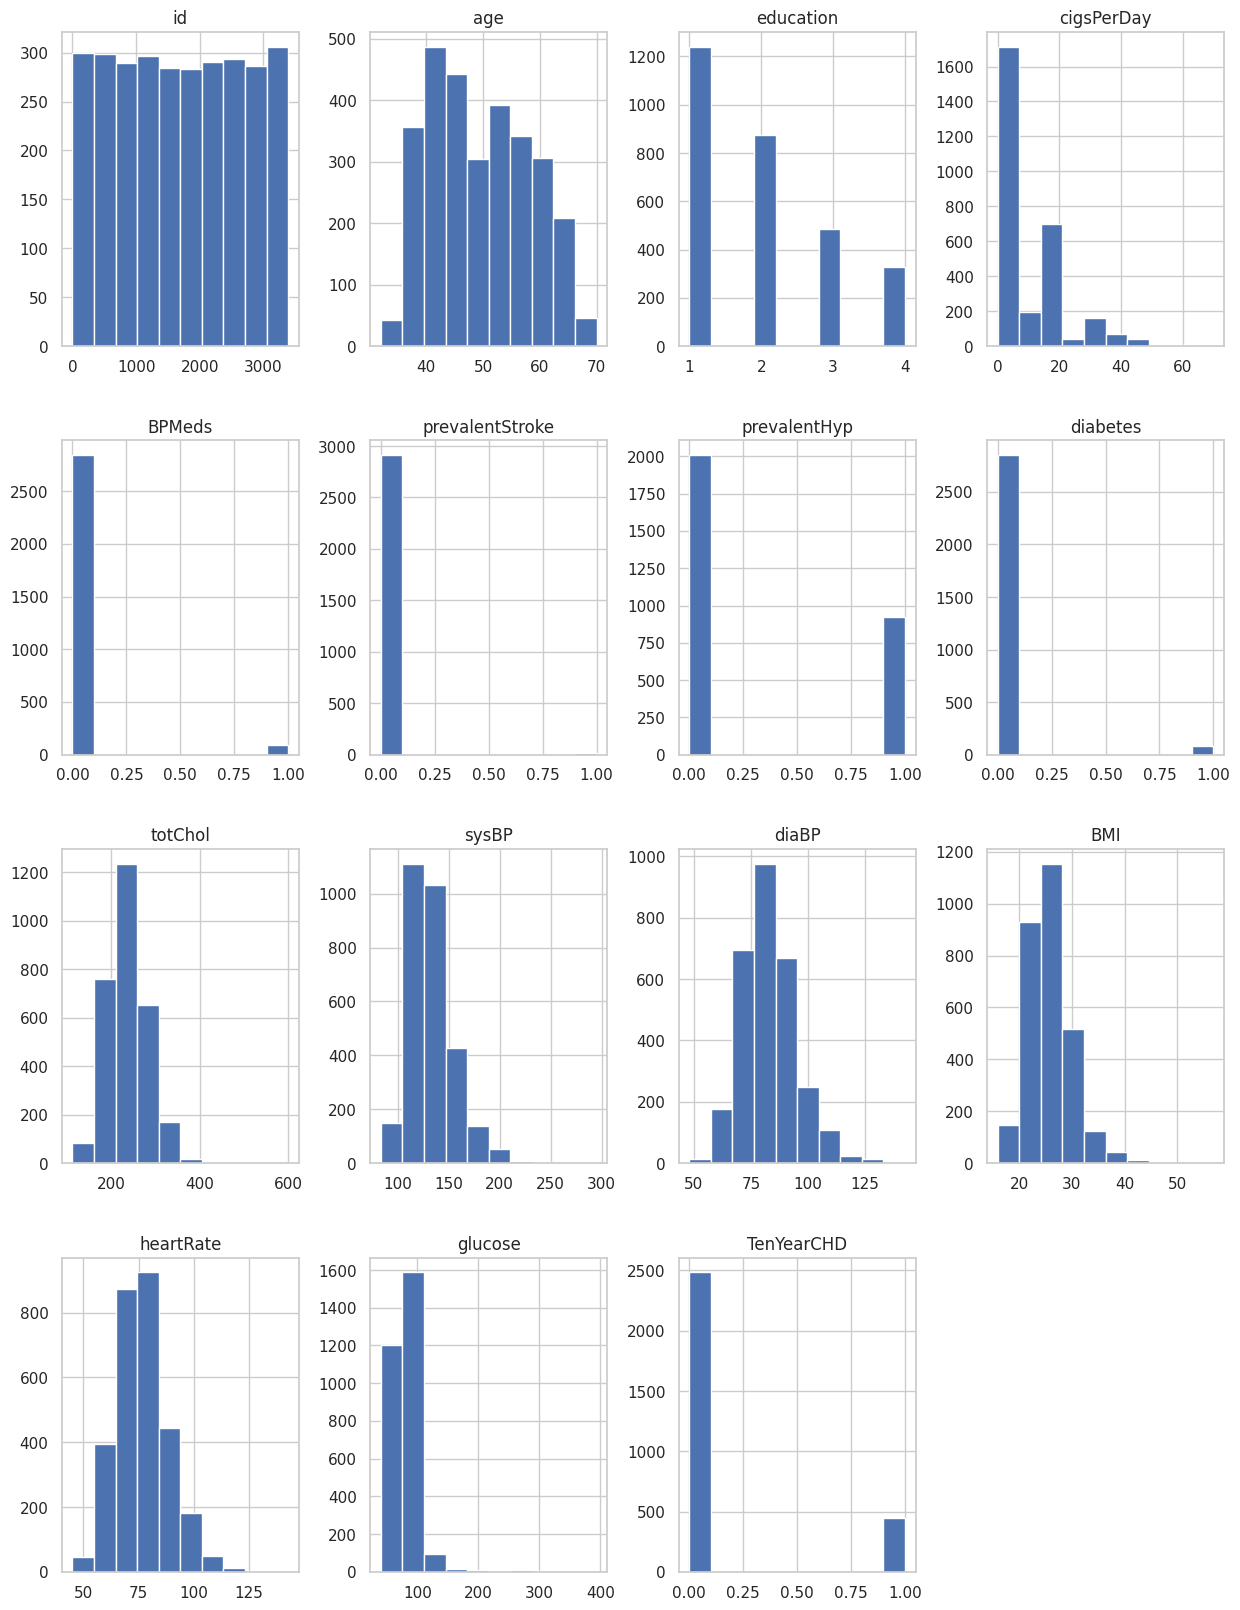

In [23]:
fig=plt.figure(figsize=(15,20))
ax =fig.gca()
df.hist(ax = ax)
plt.show()

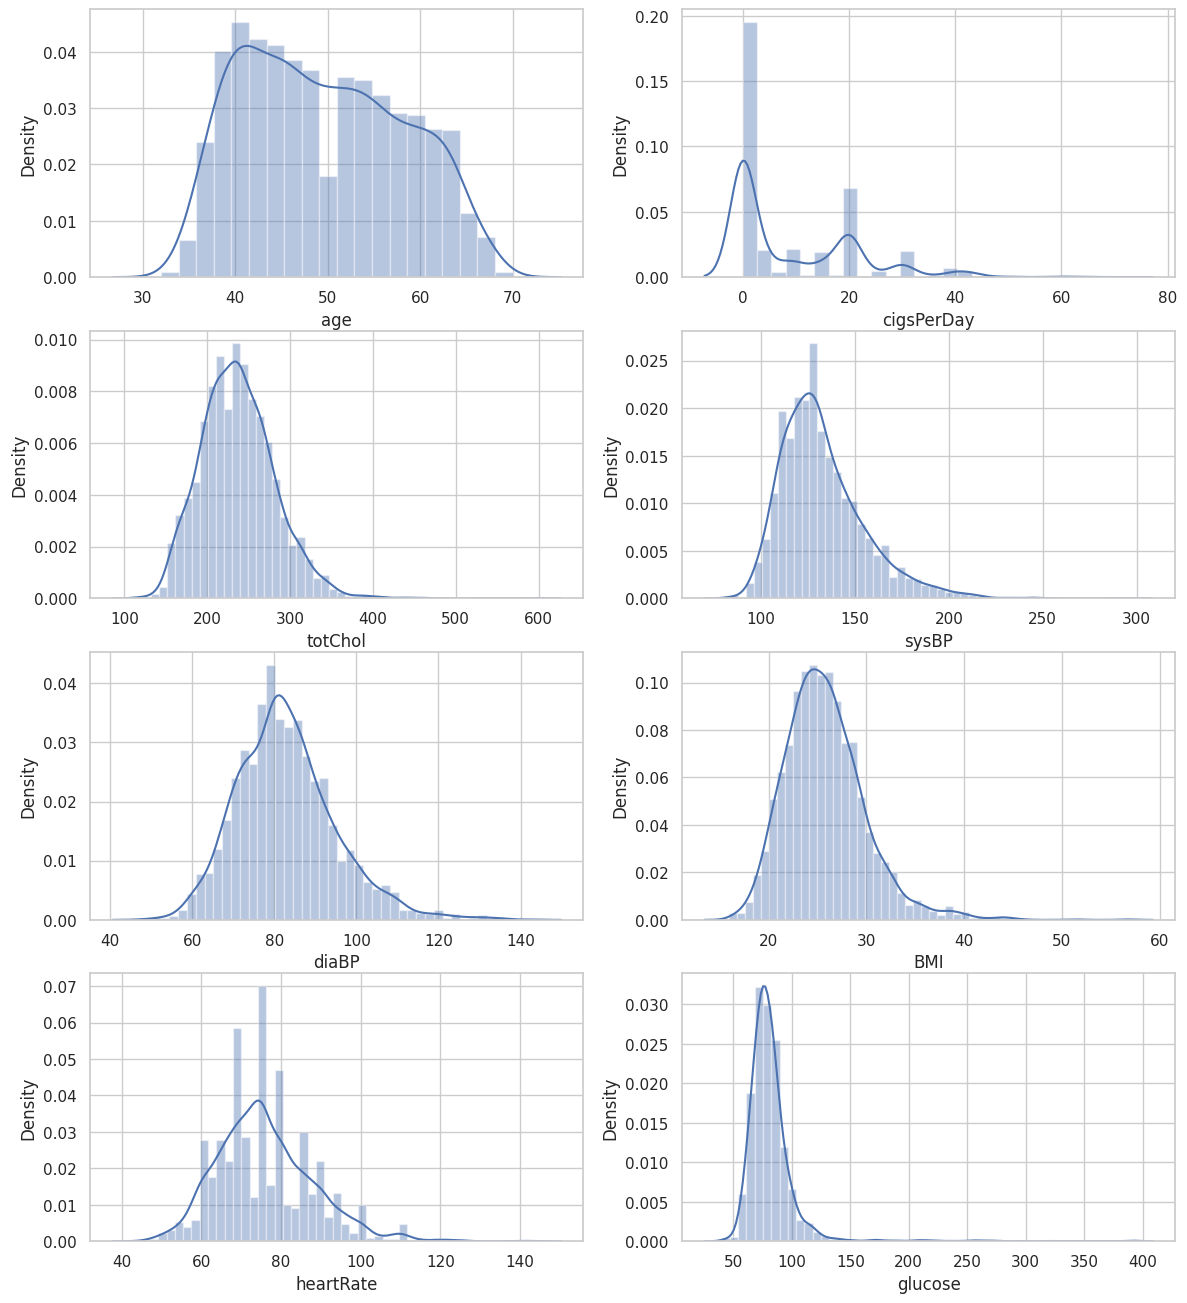

In [24]:
f, axes = plt.subplots(4, 2, figsize=(14,16))

index1 = 0
index2 = 0

for col in numeric_features:
    sns.distplot(df[col], ax=axes[index1][index2]);
    index2 = index2+1
    if index2==2:
        index2 = 0
        index1 = index1+1
plt.show();

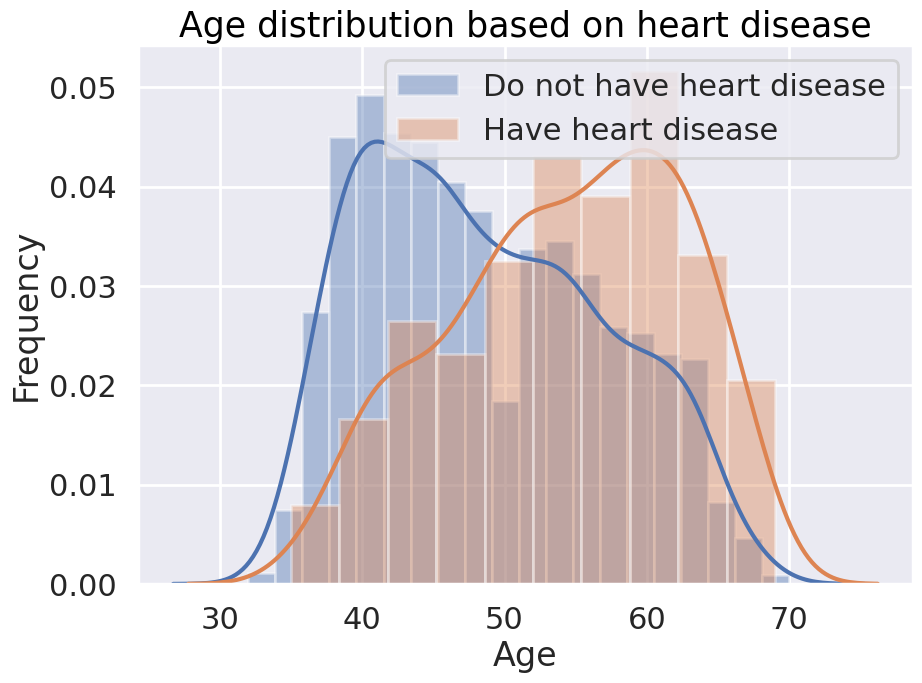

In [25]:
sns.set_theme(context='poster')
plt.figure(figsize=(10,7))
plt.title('Age distribution based on heart disease', color="Black",fontsize=25)

sns.distplot(df[df['TenYearCHD'] == 0]['age'], label='Do not have heart disease')
sns.distplot(df[df['TenYearCHD'] == 1]['age'], label = 'Have heart disease')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

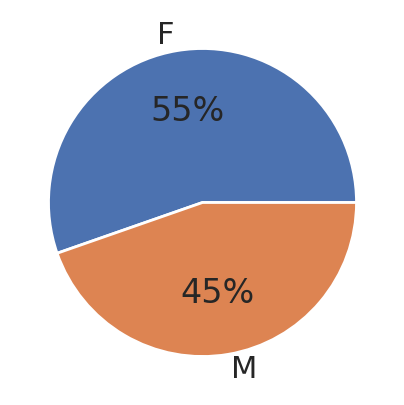

In [26]:
# list for the sex column
gender = ['F','M']

# make an object which store value count of the elements in sex column
gender_data = pd.Series(df['sex']).value_counts()

# adjust size of the pie chart
plt.figure(figsize=(5,5))

# ploting pie chart
plt.pie(gender_data,labels=gender,autopct='%.0f%%')

plt.show()

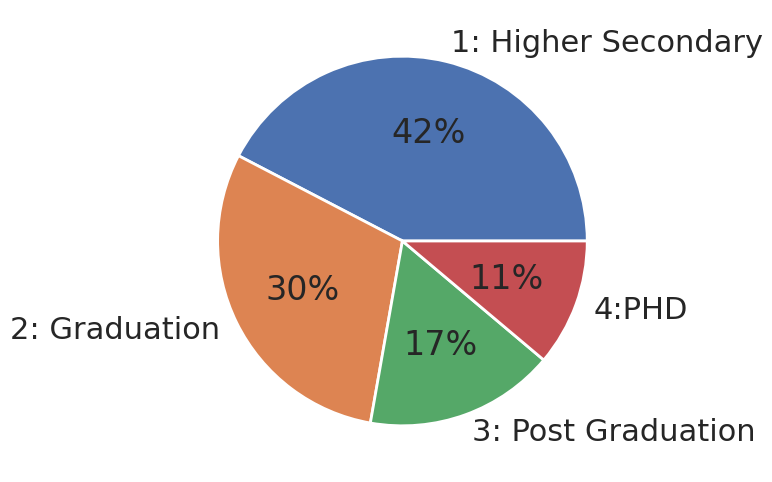

In [27]:
# list for the chest pain type column
chest_pain = [ '1: Higher Secondary', '2: Graduation',
              '3: Post Graduation','4:PHD']

# make an object which store value count of the elements in chest pain type column
cp_data = pd.Series(df['education']).value_counts()

# adjust size of the pie chart
plt.figure(figsize=(6,6))

# ploting pie chart
plt.pie(cp_data,labels=chest_pain,autopct='%.0f%%')
plt.show()

In [28]:
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

<Axes: xlabel='is_smoking', ylabel='count'>

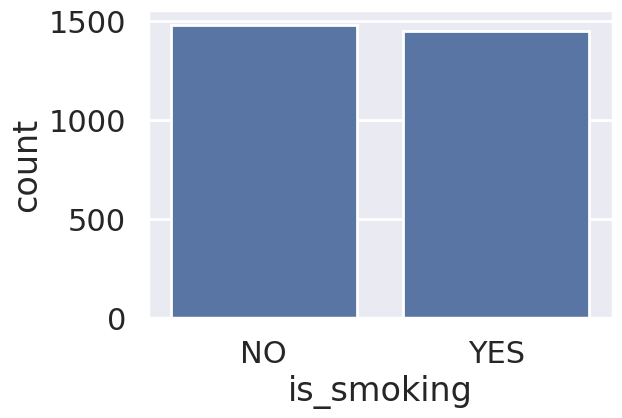

In [29]:
# count plot for  is_smoking column
plt.figure(figsize=(6,4))
sns.countplot(data=df,x='is_smoking')

## **Bivariant** **Analysis**

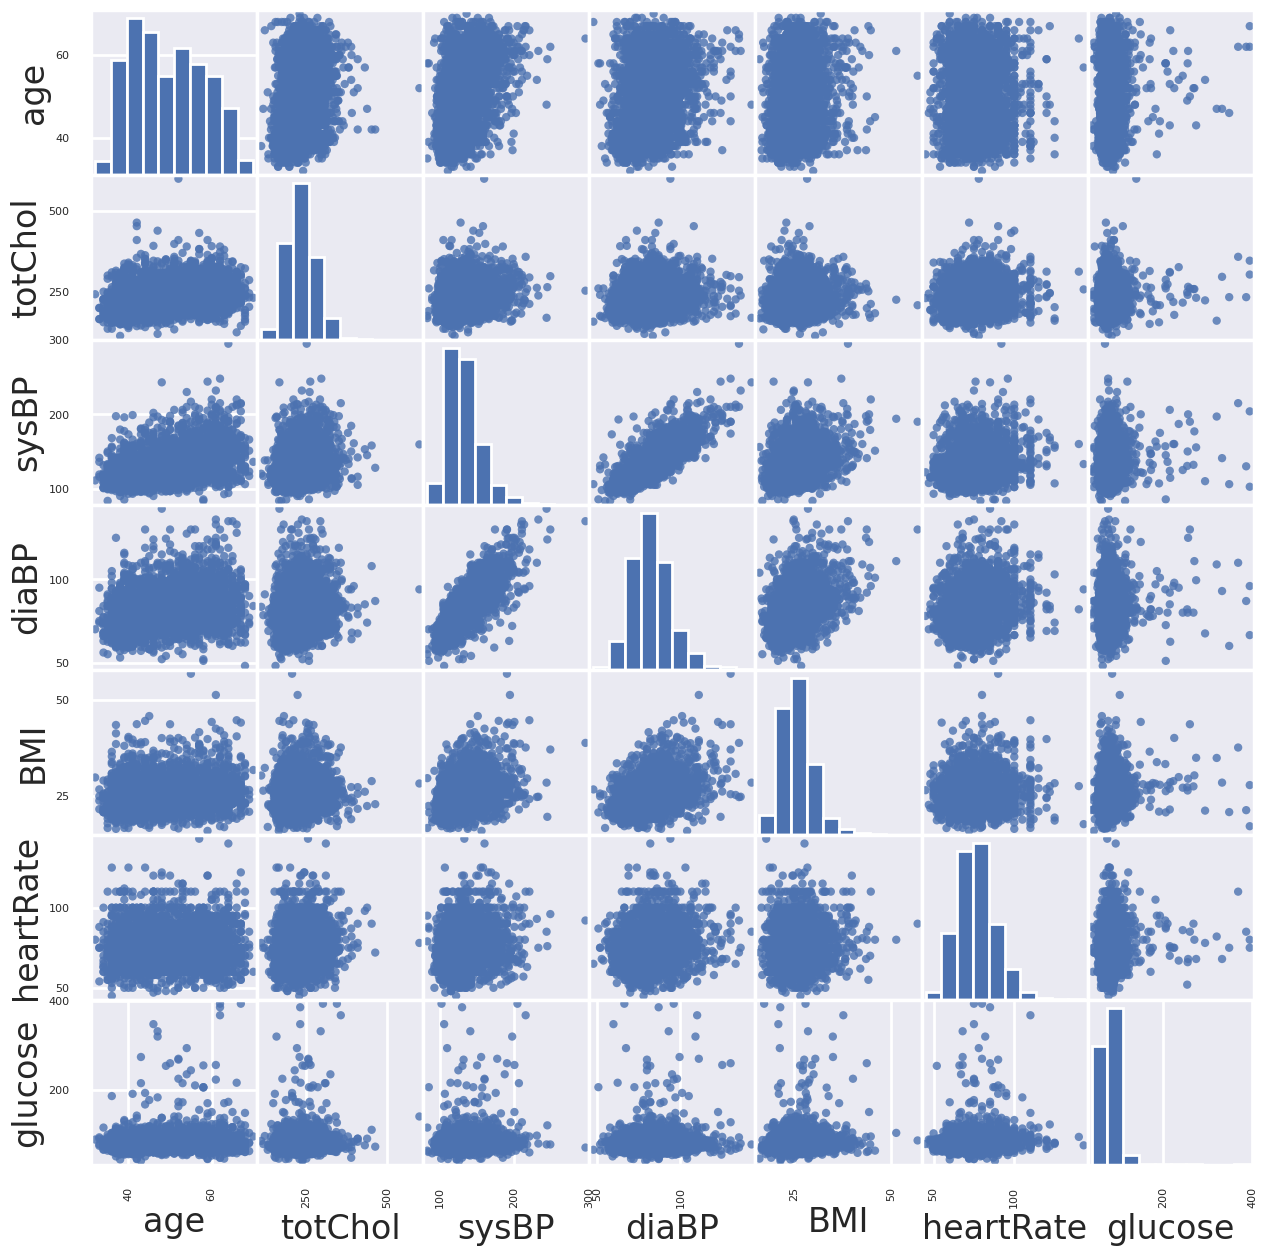

In [30]:
import matplotlib.pyplot as plt

# Define the features you want to include in the scatter plot
selected_features = ['age', 'totChol', 'sysBP', 'diaBP','BMI','heartRate','glucose']

# Create a scatter plot for the selected features
pd.plotting.scatter_matrix(df[selected_features], alpha=0.8, figsize=(15, 15), diagonal='hist')

# Show the plot
plt.show()

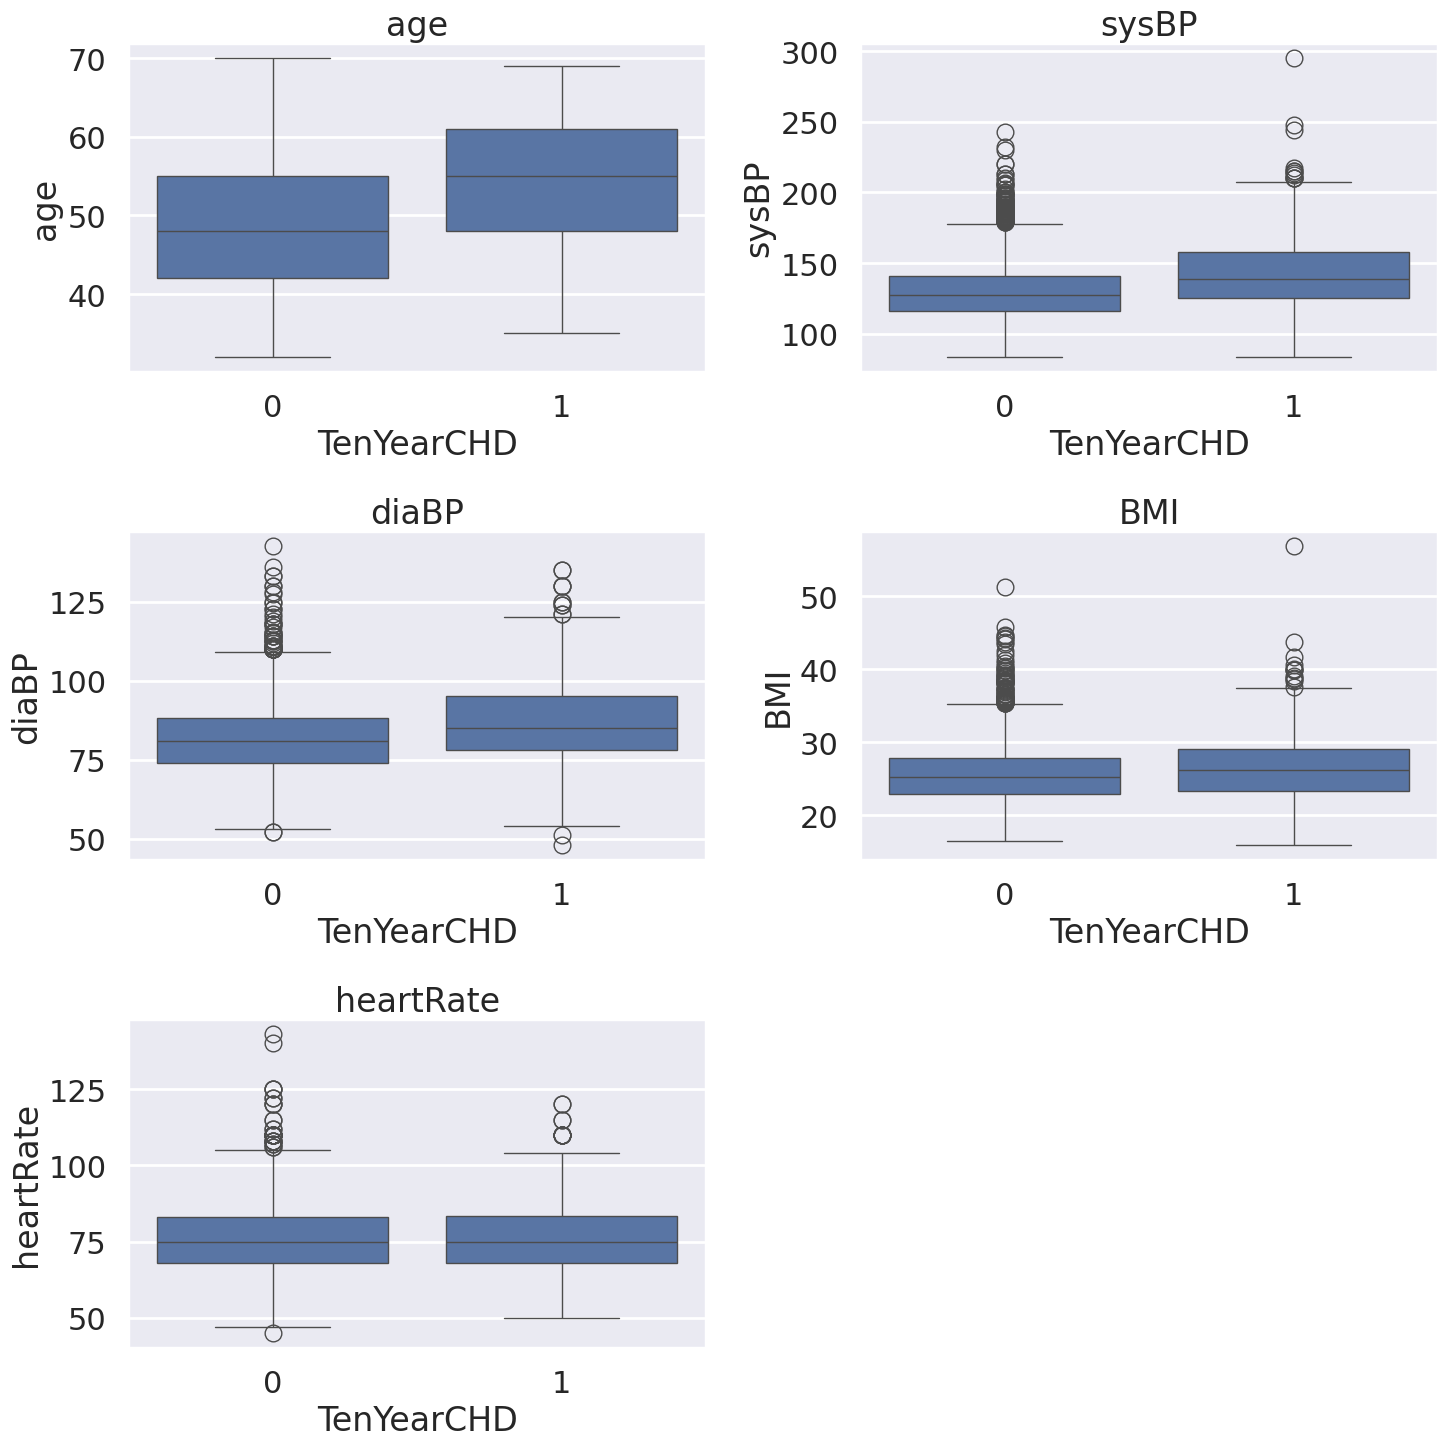

In [31]:
# making boxplots to see the distribution
plt.figure(figsize=(15,15))

plt.subplot(3,2,1)
sns.boxplot(x=df['TenYearCHD'],y=df['age'])
plt.title('age')

plt.subplot(3,2,2)
sns.boxplot(x=df['TenYearCHD'],y=df['sysBP'])
plt.title('sysBP')

plt.subplot(3,2,3)
sns.boxplot(x=df['TenYearCHD'],y=df['diaBP'])
plt.title('diaBP')

plt.subplot(3,2,4)
sns.boxplot(x=df['TenYearCHD'],y=df['BMI'])
plt.title('BMI')

plt.subplot(3,2,5)
sns.boxplot(x=df['TenYearCHD'],y=df['heartRate'])
plt.title('heartRate')

plt.tight_layout()

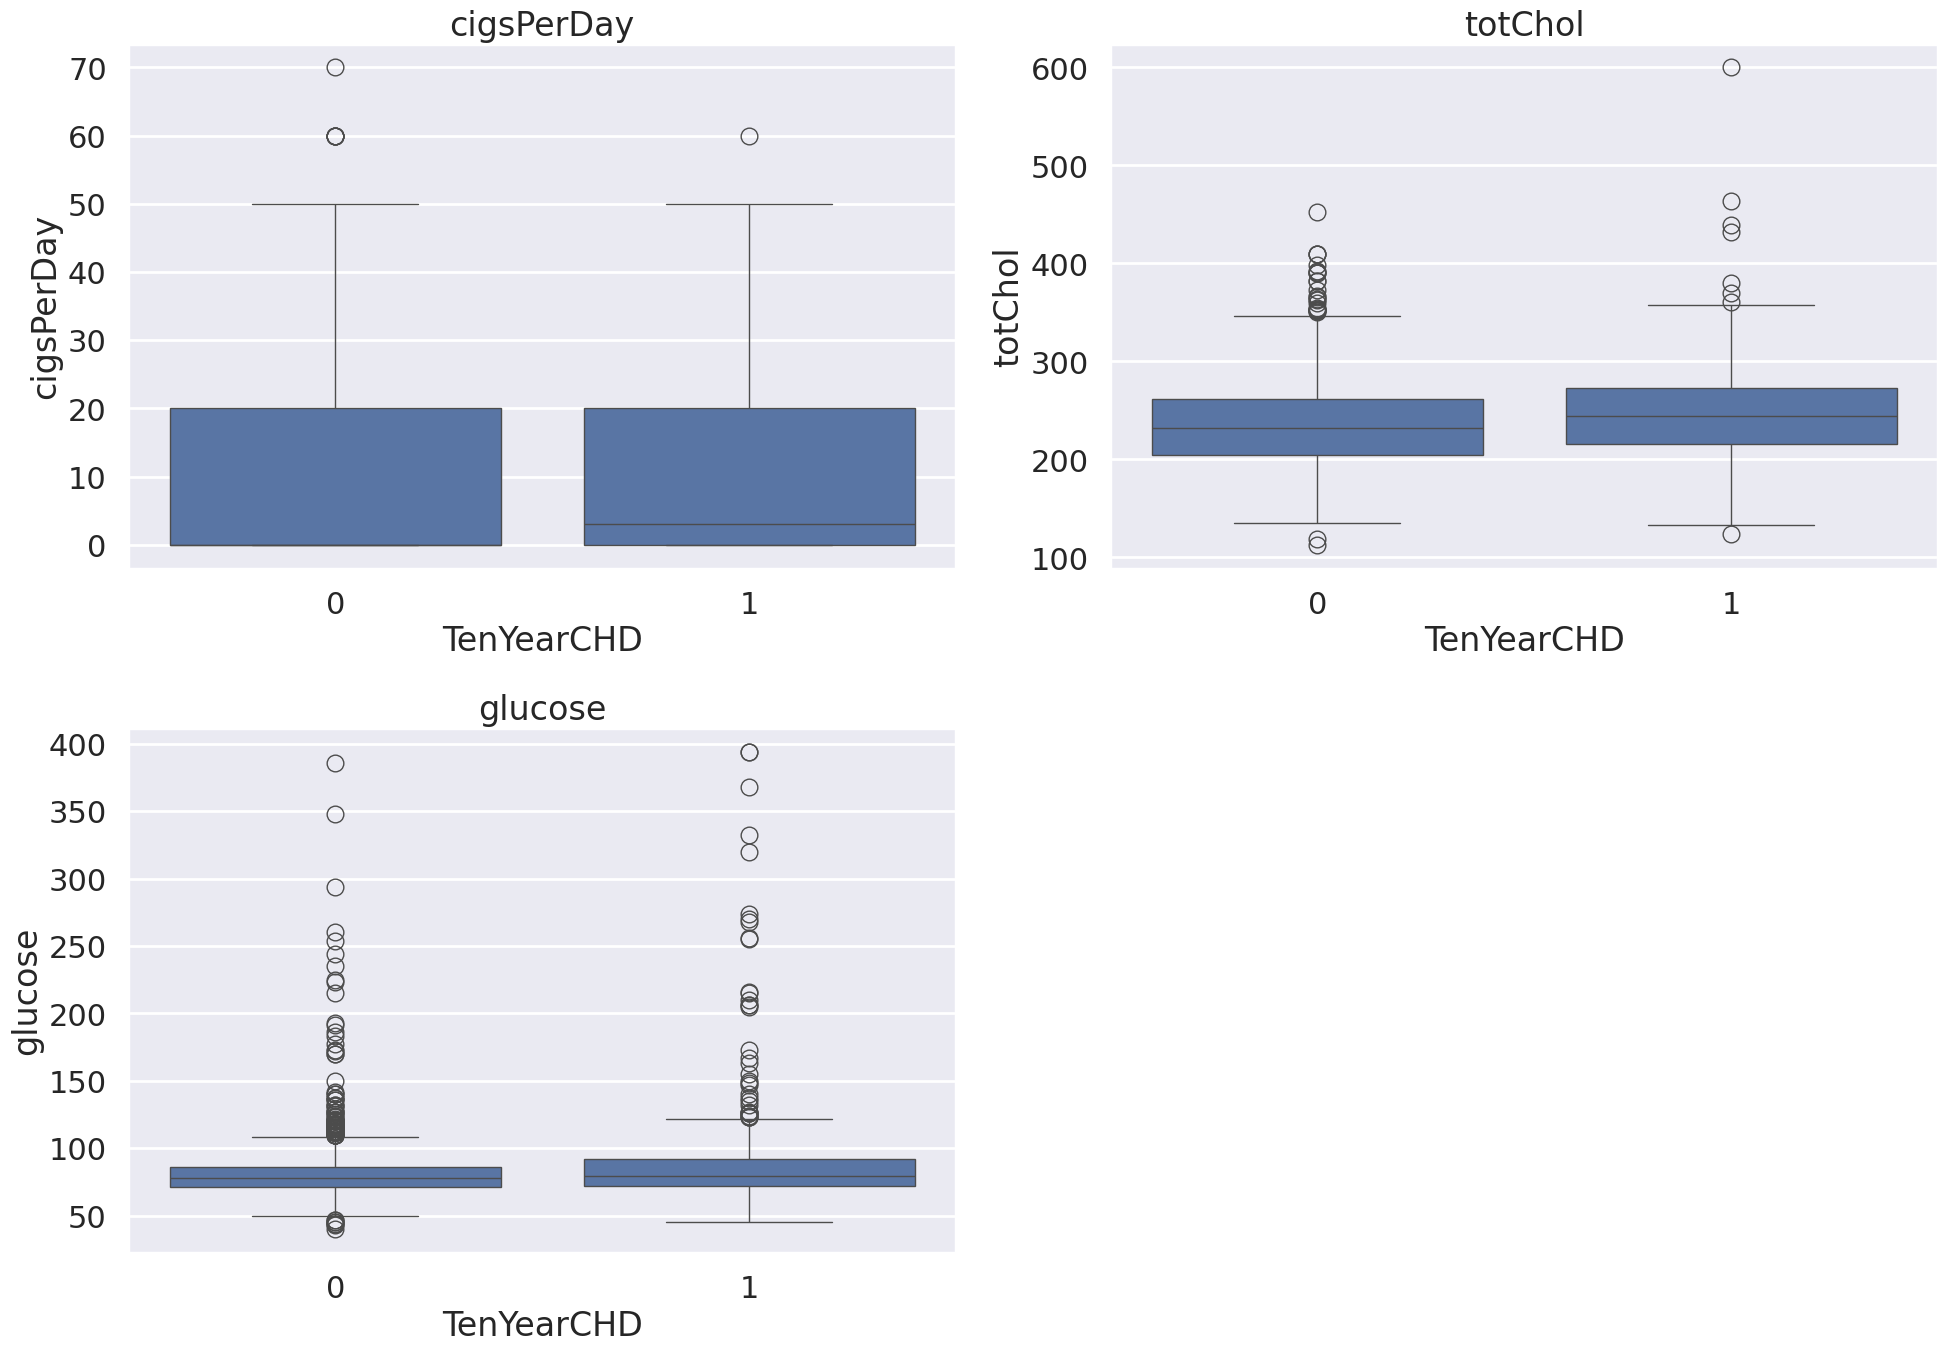

In [32]:
# making boxplots to see the distribution
plt.figure(figsize=(20,20))

plt.subplot(3,2,1)
sns.boxplot(x=df['TenYearCHD'],y=df['cigsPerDay'])
plt.title('cigsPerDay')

plt.subplot(3,2,2)
sns.boxplot(x=df['TenYearCHD'],y=df['totChol'])
plt.title('totChol')

plt.subplot(3,2,3)
sns.boxplot(x=df['TenYearCHD'],y=df['glucose'])
plt.title('glucose')

plt.tight_layout()

<Figure size 2000x2000 with 0 Axes>

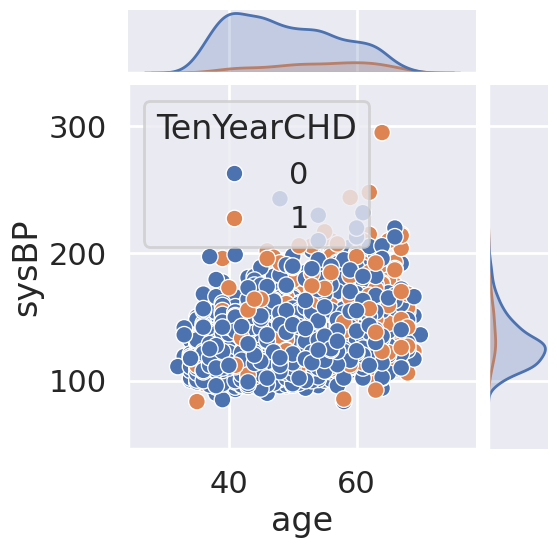

In [33]:
# jointplot for 'Age' vs 'sysBP'
plt.figure(figsize=(20,20))
sns.jointplot(data=df,x='age',y='sysBP',hue='TenYearCHD')

<Figure size 2000x2000 with 0 Axes>

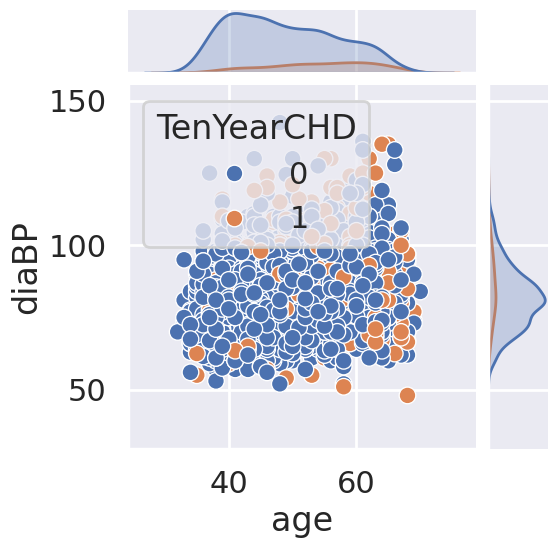

In [34]:
# jointplot for 'Age' vs 'diaBP'
plt.figure(figsize=(20,20))
sns.jointplot(data=df,x='age',y='diaBP',hue='TenYearCHD')

<Figure size 2000x2000 with 0 Axes>

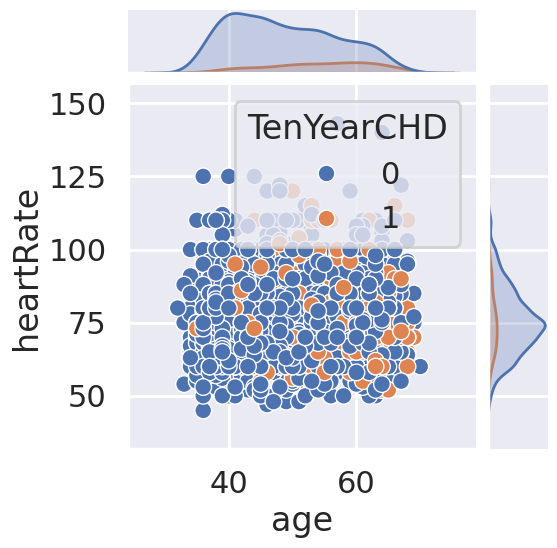

In [35]:
# jointplot for 'Age' vs 'heartRate'
plt.figure(figsize=(20,20))
sns.jointplot(data=df,x='age',y='heartRate',hue='TenYearCHD')

<Figure size 2000x2000 with 0 Axes>

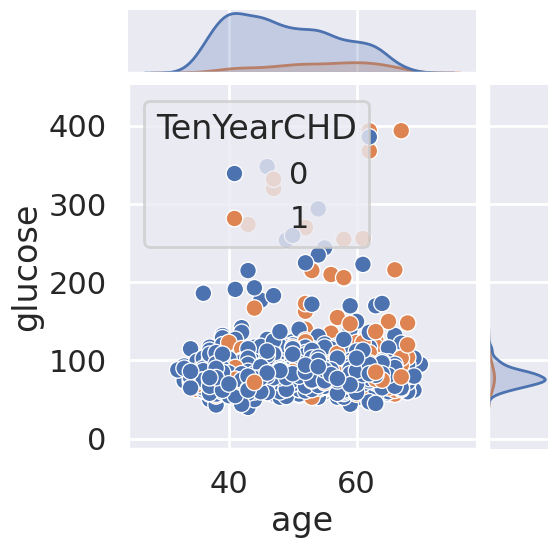

In [36]:
# jointplot for 'Age' vs 'glucose'
plt.figure(figsize=(20,20))
sns.jointplot(data=df,x='age',y='glucose',hue='TenYearCHD')

<Figure size 2000x2000 with 0 Axes>

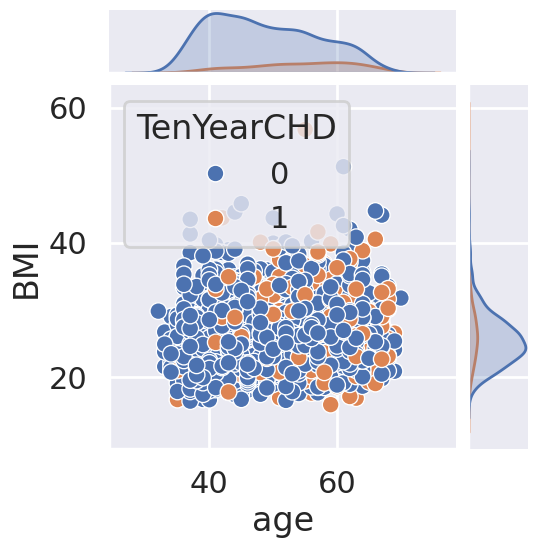

In [37]:
# jointplot for 'Age' vs 'BMI'
plt.figure(figsize=(20,20))
sns.jointplot(data=df,x='age',y='BMI',hue='TenYearCHD')

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from operator import add

def stacked_barchart(df, title=None, ylabel=None, xlabel=None):
    default_colors = ['#008080', '#5f3c41', '#219AD8']
    # From raw value to percentage
    totals = df.sum(axis=1)
    bars = ((df.T / totals) * 100).T
    r = list(range(df.index.size))

    # Plot
    barWidth = 0.95
    names = df.index.tolist()
    bottom = [0] * bars.shape[0]

    # Create bars
    color_index = 0
    plots = []
    for bar in bars.columns:
        plots.append(plt.bar(r, bars[bar], bottom=bottom, color=default_colors[color_index], edgecolor='white', width=barWidth))
        bottom = list(map(add, bottom, bars[bar]))
        color_index = 0 if color_index >= len(default_colors) else color_index + 1

    # Custom x axis
    plt.title(title)
    plt.xticks(r, names)
    plt.xlabel(df.index.name if xlabel is None else xlabel)
    plt.ylabel(df.columns.name if ylabel is None else ylabel)
    ax = plt.gca()

    y_labels = ax.get_yticks()
    ax.set_yticklabels([str(y) + '%' for y in y_labels])

    flat_list = [item for sublist in df.T.values for item in sublist]
    for i, d in zip(ax.patches, flat_list):
        data_label = str(d) + " (" + str(round(i.get_height(), 2)) + "%)"
        ax.text(i.get_x() + 0.45, i.get_y() + 5, data_label, horizontalalignment='center', verticalalignment='center', fontdict=dict(color='white', size=20))

    for item in ([ax.title]):
        item.set_fontsize(27)

    for item in ([ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(24)

    legend = ax.legend(plots, df.columns.tolist(), fancybox=True)
    plt.setp(legend.get_texts(), fontsize='20')

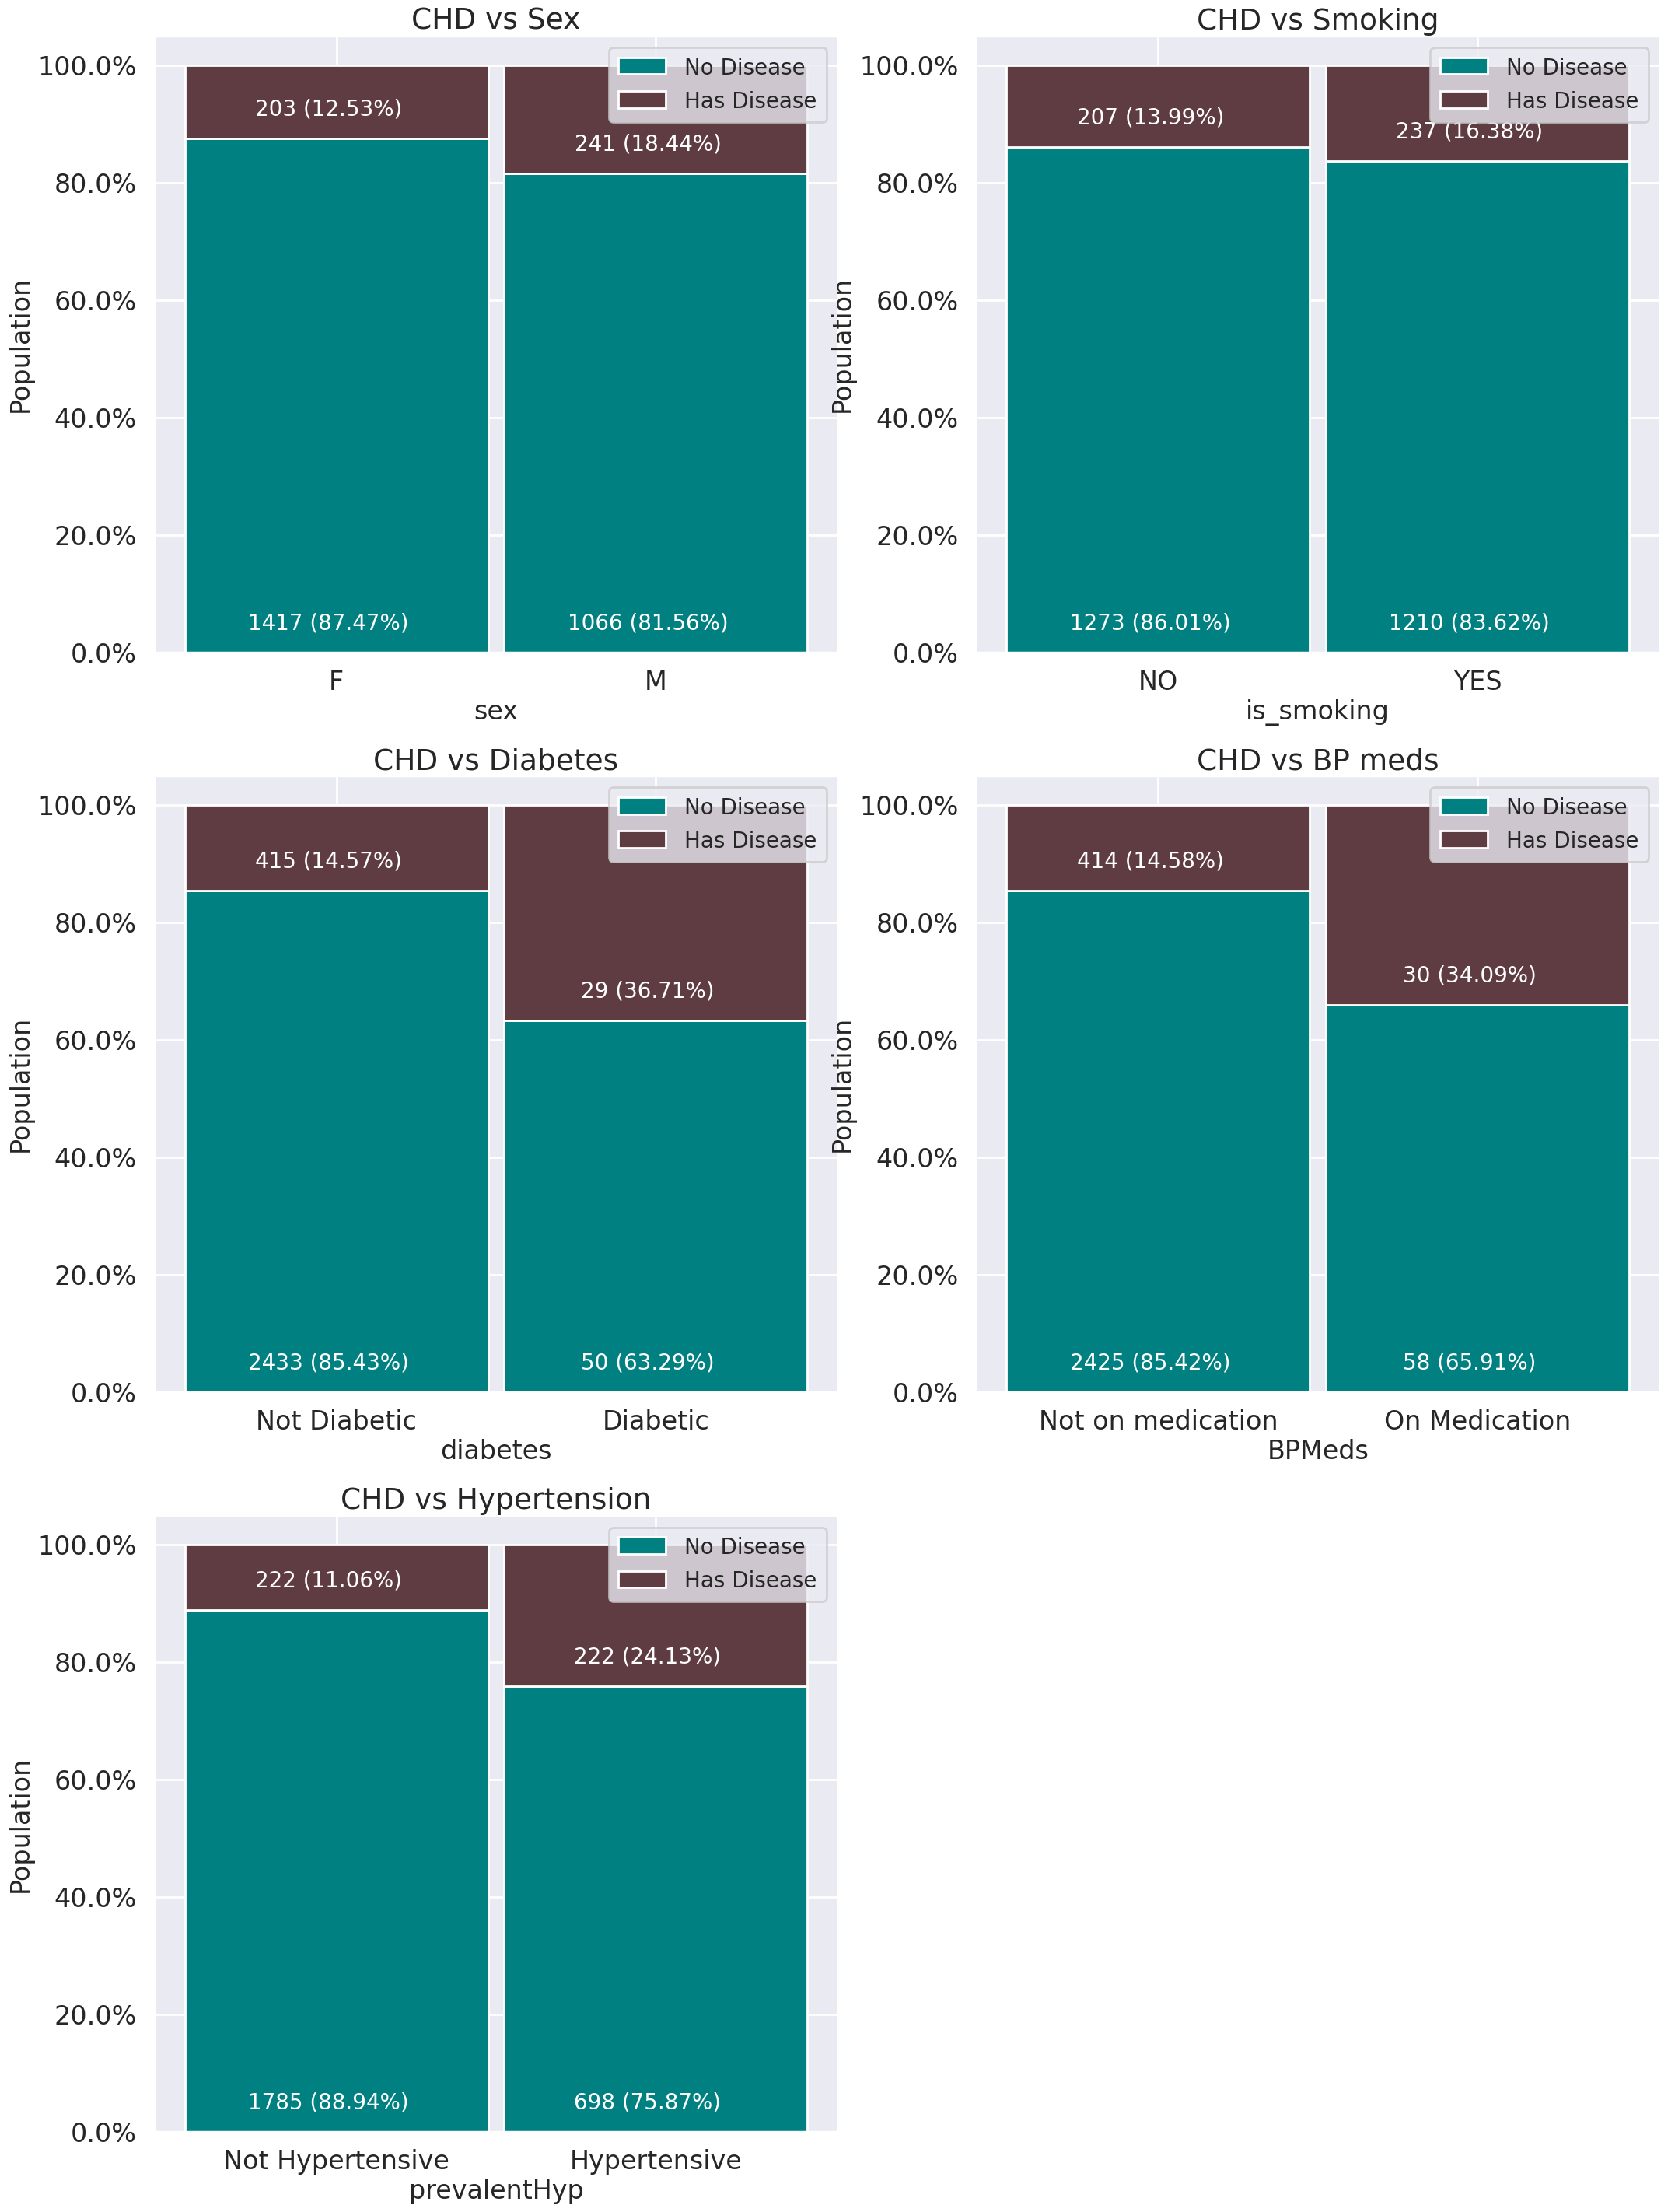

In [39]:
fig = plt.gcf()
fig.set_size_inches(25, 35)
grid_rows = 3
grid_cols = 2

# Draw sex vs disease outcome
plt.subplot(grid_rows, grid_cols, 1)
temp = df[['sex', 'TenYearCHD']].groupby(['sex', 'TenYearCHD']).size().unstack('TenYearCHD')
temp.rename(index={0: 'F', 1: 'M'}, columns={0: 'No Disease', 1: 'Has Disease'}, inplace=True)
stacked_barchart(temp, title='CHD vs Sex', ylabel='Population')

# Draw smoking status vs disease outcome
plt.subplot(grid_rows, grid_cols, 2)
temp = df[['is_smoking', 'TenYearCHD']].groupby(['is_smoking', 'TenYearCHD']).size().unstack('TenYearCHD')
temp.rename(index={0: 'Not a Smoker', 1: 'Smoker'}, columns={0: 'No Disease', 1: 'Has Disease'}, inplace=True)
stacked_barchart(temp, title='CHD vs Smoking', ylabel='Population')

# Draw diabetes vs disease outcome
plt.subplot(grid_rows, grid_cols, 3)
temp = df[['diabetes', 'TenYearCHD']].groupby(['diabetes', 'TenYearCHD']).size().unstack('TenYearCHD')
temp.rename(index={0: 'Not Diabetic', 1: 'Diabetic'}, columns={0: 'No Disease', 1: 'Has Disease'}, inplace=True)
stacked_barchart(temp, title='CHD vs Diabetes', ylabel='Population')

# Draw BP meds vs disease outcome
plt.subplot(grid_rows, grid_cols, 4)
temp = df[['BPMeds', 'TenYearCHD']].groupby(['BPMeds', 'TenYearCHD']).size().unstack('TenYearCHD')
temp.rename(index={0: 'Not on medication', 1: 'On Medication'}, columns={0: 'No Disease', 1: 'Has Disease'}, inplace=True)
stacked_barchart(temp, title='CHD vs BP meds', ylabel='Population')

# Draw Hypertension vs disease outcome
plt.subplot(grid_rows, grid_cols, 5)
temp = df[['prevalentHyp', 'TenYearCHD']].groupby(['prevalentHyp', 'TenYearCHD']).size().unstack('TenYearCHD')
temp.rename(index={0: 'Not Hypertensive', 1: 'Hypertensive'}, columns={0: 'No Disease', 1: 'Has Disease'}, inplace=True)
stacked_barchart(temp, title='CHD vs Hypertension', ylabel='Population')

plt.show()

In [40]:
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000
mean,1692.869833,49.507345,1.965494,9.112743,0.030065,0.006150,0.314315,0.026990,237.129142,132.626409,82.906218,25.797041,75.888282,81.934404,0.151691
std,986.025198,8.597191,1.017199,11.882784,0.170795,0.078192,0.464322,0.162082,44.613282,22.326197,12.078873,4.130376,11.971207,24.106943,0.358783
min,1.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,836.500000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,74.500000,23.030000,68.000000,71.000000,0.000000
50%,1689.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.500000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2547.500000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


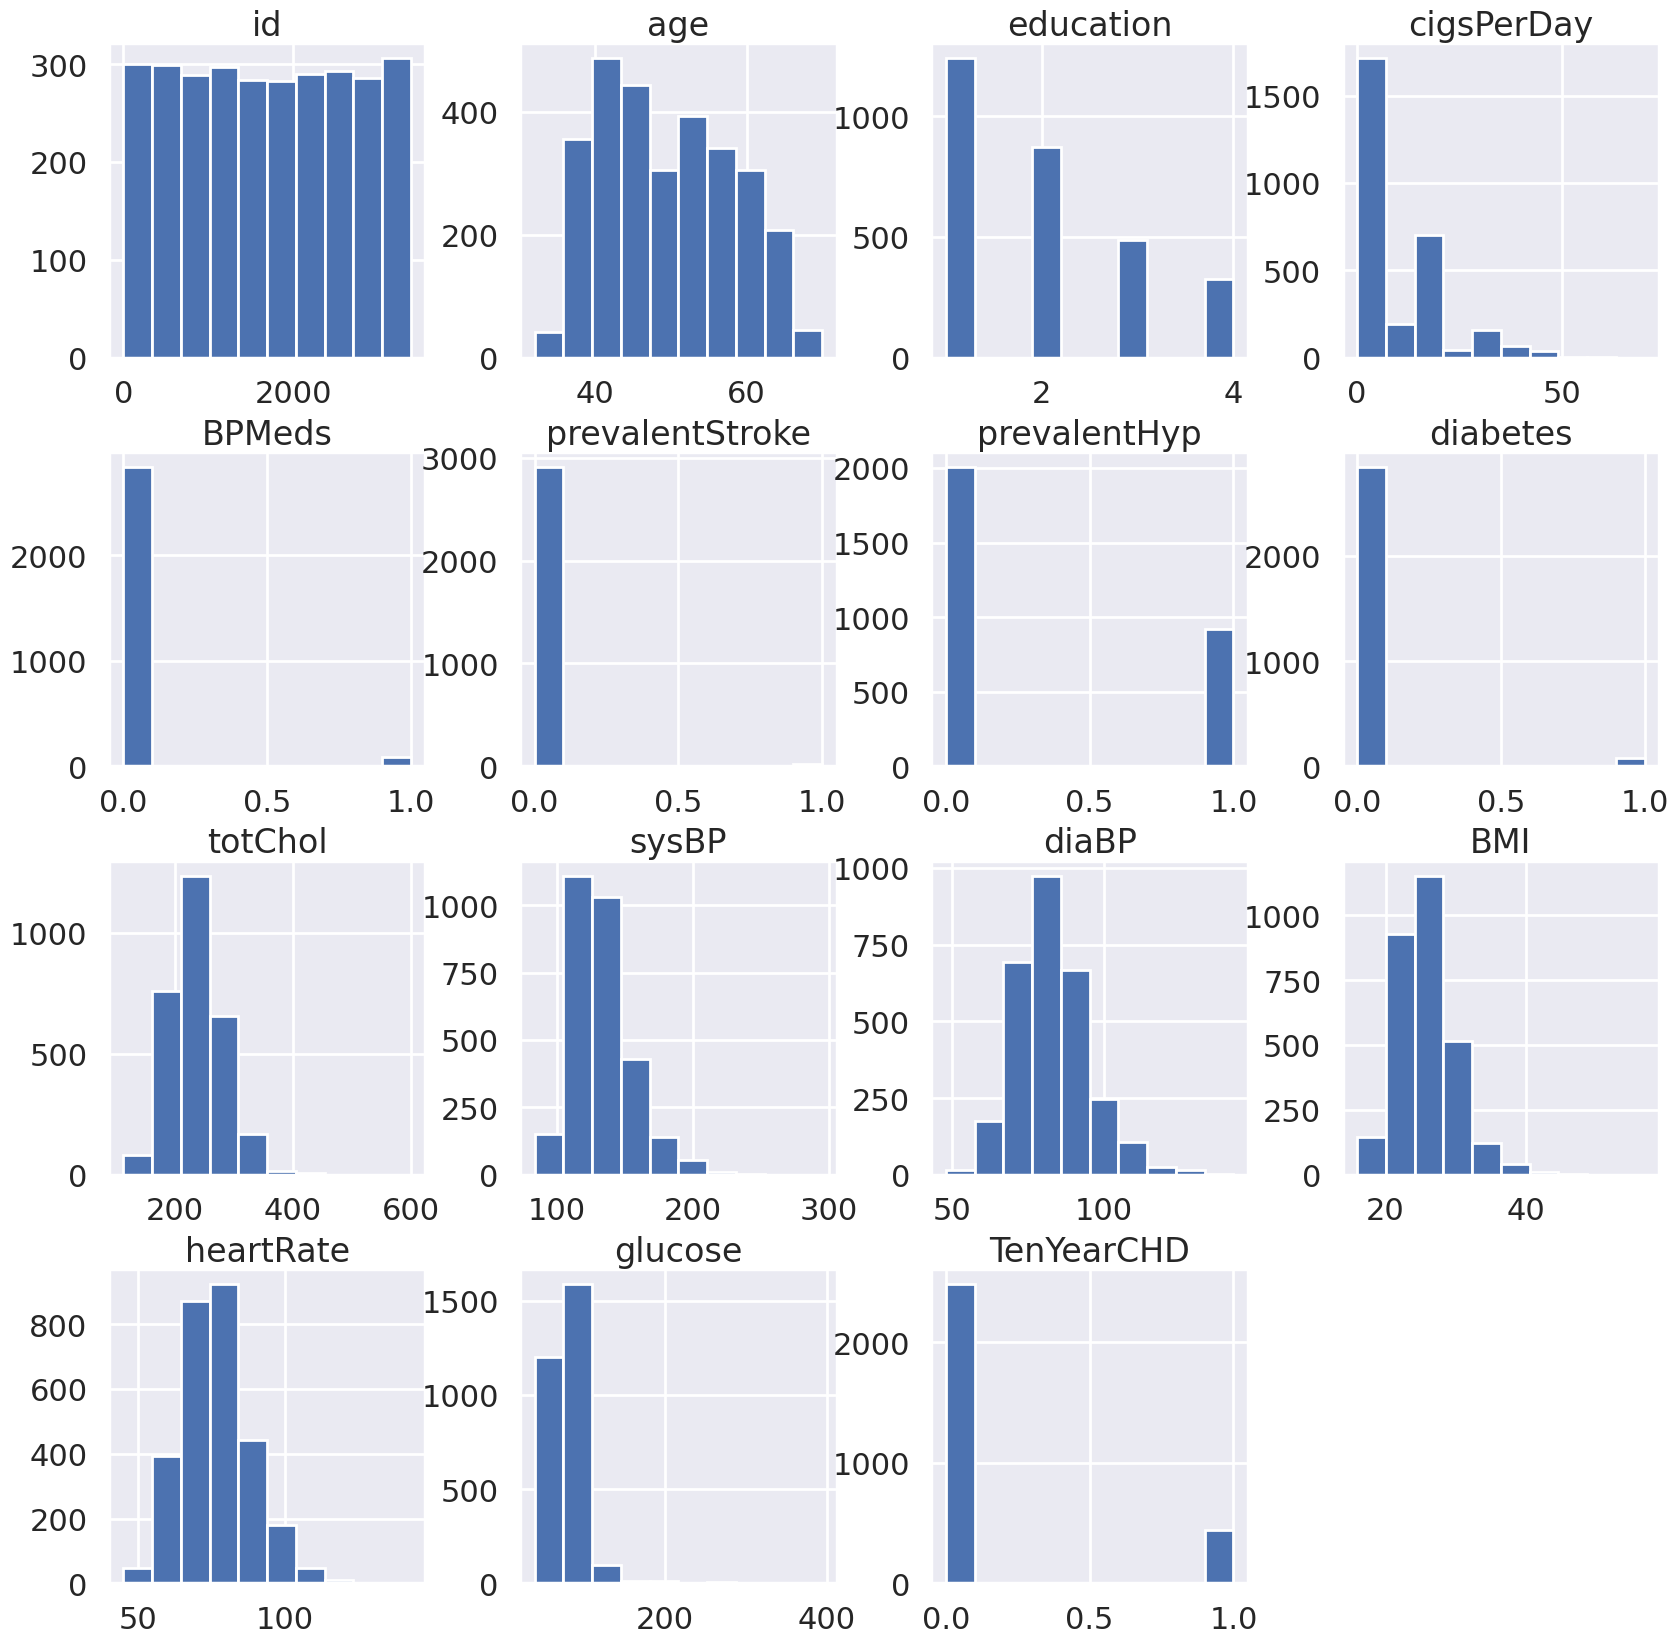

In [41]:
fig=plt.figure(figsize=(20,20))
ax=fig.gca()
df.hist(ax=ax);

In [42]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
5,5,61,3.0,F,NO,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1


In [43]:
import scipy.stats as st

In [44]:
st.norm.interval(confidence=0.95,loc=np.mean(df['age']),scale=st.sem(df['age']))

(49.19589185644393, 49.81879895325884)

In [45]:
from statsmodels.graphics.gofplots import qqplot

In [46]:
st.shapiro(df.age)

ShapiroResult(statistic=0.9656153321266174, pvalue=7.19955754042703e-26)

In this case, we are accepting the alternative hypothesis.

In [47]:
import scipy.stats as stats

In [48]:
df['is_smoking']=df["is_smoking"].map({"YES":1,"NO":0})
df['sex']=df["sex"].map({"M":1,"F":0})


In [49]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1,1,36,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
5,5,61,3.0,0,0,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1


In [50]:
df=df.drop(["id"],axis=1)

In [51]:
df.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

## statistics on the top features

In [52]:
import statsmodels.api as sm

# Models and Predictions

Given that the dataset exhibits a significant class imbalance, with approximately six negative cases for every positive case, there is a risk of developing a classifier that is biased toward the negative class. Such a classifier may yield high accuracy but poor precision and recall. To mitigate this issue, we will balance the dataset using the Synthetic Minority Oversampling Technique (SMOTE). This technique involves generating synthetic samples for the minority class to achieve a more balanced distribution, which can improve the performance and fairness of our predictive model.



In [53]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter

In [54]:
#Creating a dataset with only the features selected
data_features = df.drop(['is_smoking'], axis=1)
data_features.head()

,age,education,sex,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1,36,4.0,1,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,0,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,0,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
5,61,3.0,0,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1


In [55]:
X = data_features.iloc[:, 0:14]
y = data_features.iloc[:, 14]

In [56]:

X.head()

,age,education,sex,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
1,36,4.0,1,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0
2,46,1.0,0,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0
3,50,1.0,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0
4,64,1.0,0,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0
5,61,3.0,0,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0


In [57]:
y.head()

1    0
2    0
3    1
4    0
5    1
Name: TenYearCHD, dtype: int64

In [58]:
# The numbers before SMOTE
num_before = dict(Counter(y))

# Perform SMOTE
# Define Pipeline
over=SMOTE(sampling_strategy=0.8)
under=RandomUnderSampler(sampling_strategy=0.8)
steps=[("o",over),("u",under)]
pipeline = Pipeline(steps=steps)

# Transform the dataset
X_smote,y_smote=pipeline.fit_resample(X,y)

# The numbers after SMOTE
num_after=dict(Counter(y_smote))

In [59]:
print(num_before,num_after)

{0: 2483, 1: 444} {0: 2482, 1: 1986}


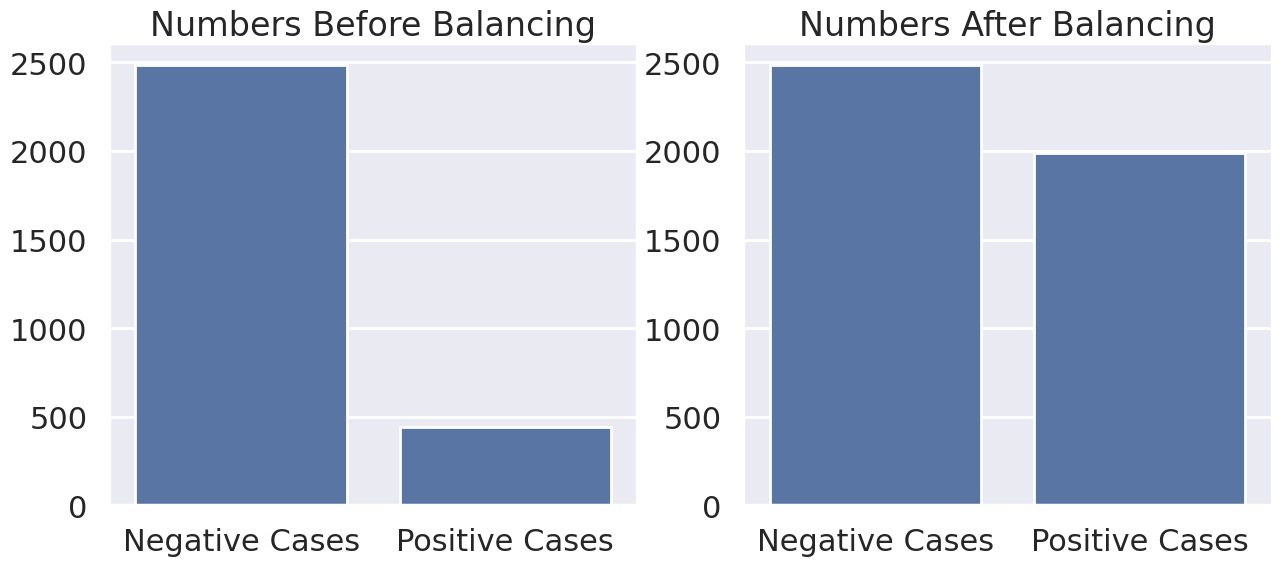

In [60]:
labels = ["Negative Cases","Positive Cases"]
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(x=labels, y=list(num_before.values()))
plt.title("Numbers Before Balancing")
plt.subplot(1,2,2)
sns.barplot(x=labels, y=list(num_after.values()))
plt.title("Numbers After Balancing")
plt.show()

# Splitting data to Training and Testing set

In [61]:
data_features.columns

Index(['age', 'education', 'sex', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [62]:
# new dataset
new_data = pd.concat([pd.DataFrame(X_smote), pd.DataFrame(y_smote)], axis=1)
new_data.columns = ['age','education' ,'sex', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp',
'diabetes', 'totChol', 'sysBP', 'diaBP','BMI', 'heartRate', 'glucose', 'TenYearCHD']
new_data.head()

,age,education,sex,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,57,3.0,0,0.0,0.0,0,1,0,366.0,146.5,80.0,24.19,85.0,73.0,0
1,61,3.0,0,0.0,0.0,0,0,0,235.0,102.0,74.5,19.22,67.0,83.0,0
2,33,2.0,1,0.0,0.0,0,1,0,165.0,141.5,95.0,26.74,54.0,77.0,0
3,58,3.0,0,0.0,0.0,0,1,0,232.0,145.0,94.0,26.38,66.0,80.0,0
4,46,1.0,0,20.0,0.0,0,0,0,203.0,117.0,68.0,21.50,110.0,85.0,0


In [63]:
X_new = new_data.iloc[:, 0:14]
y_new= new_data.iloc[:,-1]
X_new.head()

,age,education,sex,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,57,3.0,0,0.0,0.0,0,1,0,366.0,146.5,80.0,24.19,85.0,73.0
1,61,3.0,0,0.0,0.0,0,0,0,235.0,102.0,74.5,19.22,67.0,83.0
2,33,2.0,1,0.0,0.0,0,1,0,165.0,141.5,95.0,26.74,54.0,77.0
3,58,3.0,0,0.0,0.0,0,1,0,232.0,145.0,94.0,26.38,66.0,80.0
4,46,1.0,0,20.0,0.0,0,0,0,203.0,117.0,68.0,21.50,110.0,85.0


In [64]:
y_new.head()

0    0
1    0
2    0
3    0
4    0
Name: TenYearCHD, dtype: int64

In [65]:
# split the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_new,y_new,test_size=.2,random_state=42)

# Feature Scaling

Feature scaling is a technique employed to standardize the range of independent variables or features within a dataset. The primary goal is to bring all features to a common scale or range. This process often results in faster execution times for various algorithms and enhances the performance of machine learning models.

In [66]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [67]:
X_train_scaled=scaler.fit_transform(X_train)
X_train=pd.DataFrame(X_train_scaled)

X_test_scaled=scaler.transform(X_test)
X_test=pd.DataFrame(X_test_scaled)

# Models

The five algorithms that will be used are:
1. Logistic Regression
2. k-Nearest Neighbours
3. Decision Trees
4. Support Vector Machine
5.Random Forest Classifier

In [68]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score,precision_score,classification_report,roc_auc_score,roc_curve

# Logistic regression

The goal of logistic regression is to find the best fitting (yet biologically reasonable) model to describe the relationship between the dichotomous characteristic of interest (dependent variable = response or outcome variable) and a set of independent (predictor or explanatory) variables. Logistic regression generates the coefficients (and its standard errors and significance levels) of a formula to predict a logit transformation of the probability of presence of the characteristic of interest: logit function

Rather than choosing parameters that minimize the sum of squared errors (like in ordinary regression), estimation in logistic regression chooses parameters that maximize the likelihood of observing the sample values.

In [69]:
from sklearn.linear_model import LogisticRegression

In [70]:
# search for optimun parameters using gridsearch
params = {'penalty':['l1','l2'],
         'C':[0.01,0.1,1,10,100],
         'class_weight':['balanced',None]}
logistic_clf = GridSearchCV(LogisticRegression(),param_grid=params,cv=10)

In [71]:
#train the classifier
logistic_clf.fit(X_train,y_train)

logistic_clf.best_params_

{'C': 0.01, 'class_weight': 'balanced', 'penalty': 'l2'}

In [72]:
# make predictions
logistic_predict = logistic_clf.predict(X_test)

In [73]:
log_accuracy = accuracy_score(y_test,logistic_predict)
print(f"Using logistic regression we get an accuracy of {round(log_accuracy*100,2)}%")

Using logistic regression we get an accuracy of 66.33%


<Axes: >

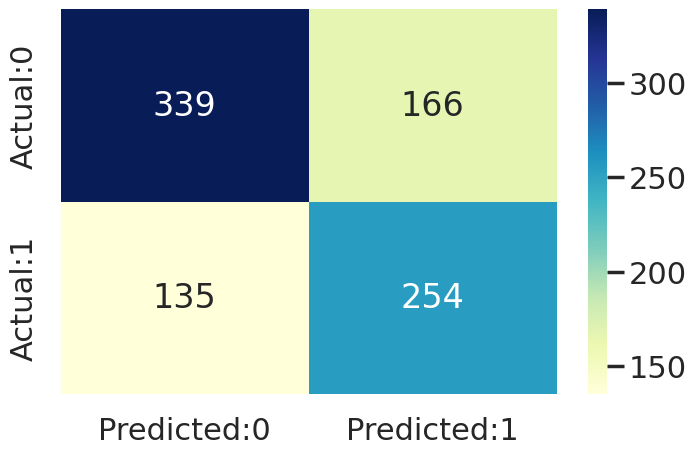

In [74]:
cm=confusion_matrix(y_test,logistic_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [75]:
print(classification_report(y_test,logistic_predict))

              precision    recall  f1-score   support

           0       0.72      0.67      0.69       505
           1       0.60      0.65      0.63       389

    accuracy                           0.66       894
   macro avg       0.66      0.66      0.66       894
weighted avg       0.67      0.66      0.66       894



In [76]:
logistic_f1 = f1_score(y_test, logistic_predict)
print(f'The f1 score for logistic regression is {round(logistic_f1*100,2)}%')

The f1 score for logistic regression is 62.79%


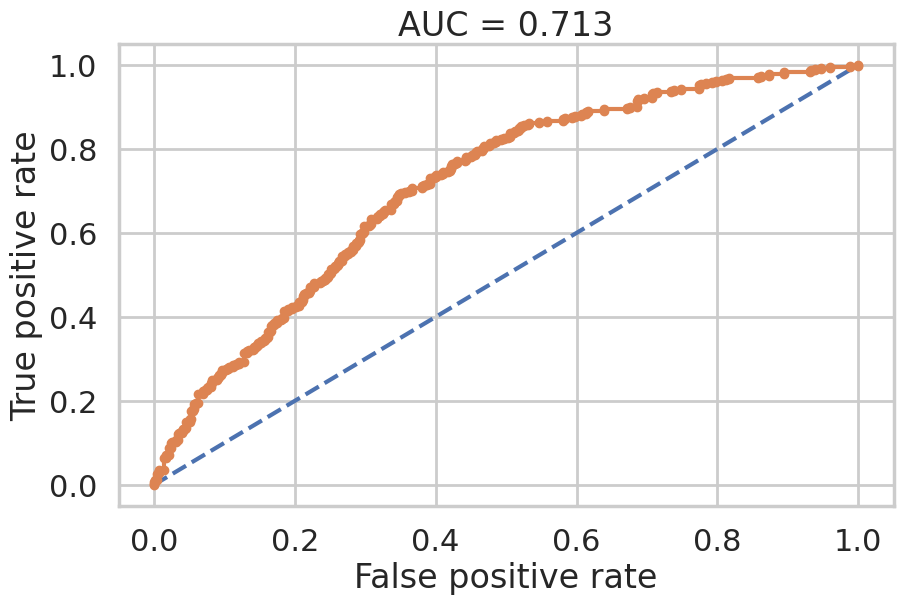

In [77]:
# ROC curve and AUC
probs = logistic_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
log_auc = roc_auc_score(y_test, probs)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(log_auc,3)}")
plt.show()

# K-Nearest Neighbours

The k-nearest-neighbors is a data classification algorithm that attempts to determine what group a data point is in by looking at the data points around it.

An algorithm, looking at one point on a grid, trying to determine if a point is in group A or B, looks at the states of the points that are near it. The range is arbitrarily determined, but the point is to take a sample of the data. If the majority of the points are in group A, then it is likely that the data point in question will be A rather than B, and vice versa.

The k-nearest-neighbor is an example of a "lazy learner" algorithm because it does not generate a model of the data set beforehand. The only calculations it makes are when it is asked to poll the data point's neighbors. This makes k-nn very easy to implement for data mining.

In [78]:
from sklearn.neighbors import KNeighborsClassifier

In [79]:
# search for optimun parameters using gridsearch
params= {'n_neighbors': np.arange(1, 10)}
grid_search = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = params,
                           scoring = 'accuracy', cv = 10, n_jobs = -1)
knn_clf = GridSearchCV(KNeighborsClassifier(),params,cv=3, n_jobs=-1)

In [80]:
# train the model
knn_clf.fit(X_train,y_train)
knn_clf.best_params_

{'n_neighbors': 1}

In [81]:
# predictions
knn_predict = knn_clf.predict(X_test)

In [82]:
#accuracy
knn_accuracy = accuracy_score(y_test,knn_predict)
print(f"Using k-nearest neighbours we get an accuracy of {round(knn_accuracy*100,2)}%")

Using k-nearest neighbours we get an accuracy of 80.43%


<Axes: >

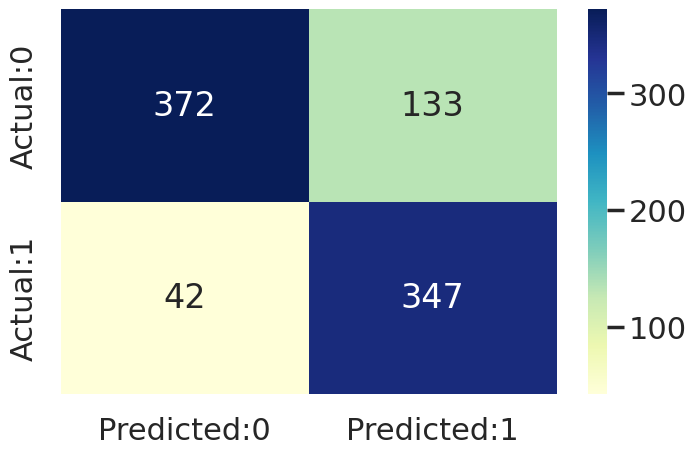

In [83]:
cm=confusion_matrix(y_test,knn_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [84]:
print(classification_report(y_test,knn_predict))

              precision    recall  f1-score   support

           0       0.90      0.74      0.81       505
           1       0.72      0.89      0.80       389

    accuracy                           0.80       894
   macro avg       0.81      0.81      0.80       894
weighted avg       0.82      0.80      0.80       894



In [85]:
knn_f1 = f1_score(y_test, knn_predict)
print(f'The f1 score for K nearest neignbours is {round(knn_f1*100,2)}%')

The f1 score for K nearest neignbours is 79.86%


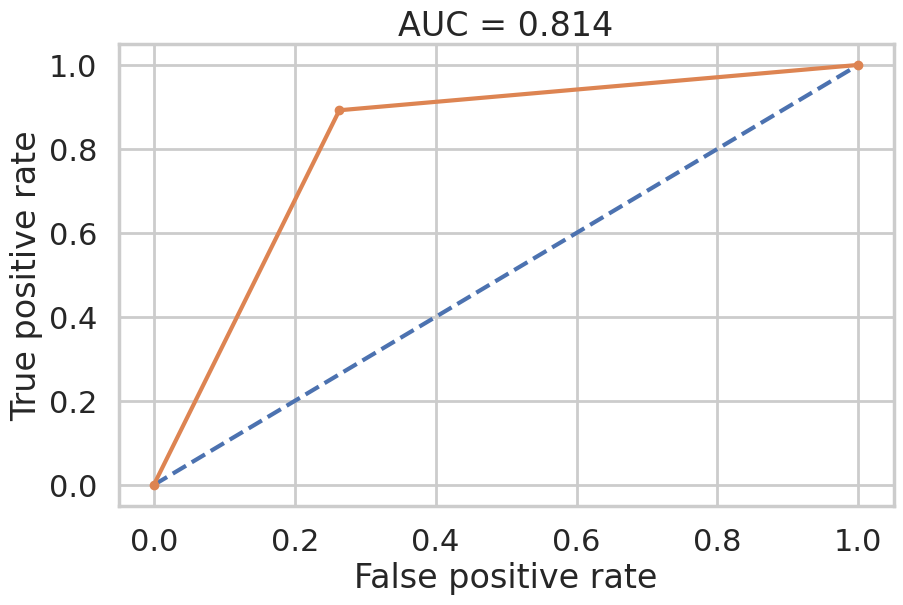

In [86]:
# ROC curve and AUC
probs = knn_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
knn_auc = roc_auc_score(y_test, probs)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(knn_auc,3)}")
plt.show()

# Decision Trees

A decision tree is a tree-like graph with nodes representing the place where we pick an attribute and ask a question; edges represent the answers the to the question; and the leaves represent the actual output or class label. They are used in non-linear decision making with simple linear decision surface.

Decision trees classify the examples by sorting them down the tree from the root to some leaf node, with the leaf node providing the classification to the example. Each node in the tree acts as a test case for some attribute, and each edge descending from that node corresponds to one of the possible answers to the test case. This process is recursive in nature and is repeated for every subtree rooted at the new nodes.

In [87]:
from sklearn.tree import DecisionTreeClassifier
dtree= DecisionTreeClassifier(random_state=7)

In [88]:
# grid search for optimum parameters
params = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15],
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11]}
tree_clf = GridSearchCV(dtree, param_grid=params, n_jobs=-1)

In [89]:
# train the model
tree_clf.fit(X_train,y_train)
tree_clf.best_params_

{'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2}

In [90]:
# predictions
tree_predict = tree_clf.predict(X_test)

In [91]:
#accuracy
tree_accuracy = accuracy_score(y_test,tree_predict)
print(f"Using Decision Trees we get an accuracy of {round(tree_accuracy*100,2)}%")

Using Decision Trees we get an accuracy of 76.06%


<Axes: >

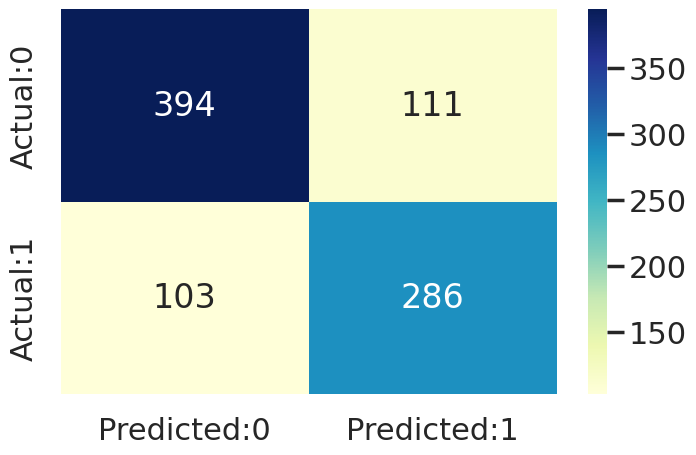

In [92]:
cm=confusion_matrix(y_test,tree_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [93]:
print(classification_report(y_test,tree_predict))

              precision    recall  f1-score   support

           0       0.79      0.78      0.79       505
           1       0.72      0.74      0.73       389

    accuracy                           0.76       894
   macro avg       0.76      0.76      0.76       894
weighted avg       0.76      0.76      0.76       894



In [94]:
tree_f1 = f1_score(y_test, tree_predict)
print(f'The f1 score Descision trees is {round(tree_f1*100,2)}%')

The f1 score Descision trees is 72.77%


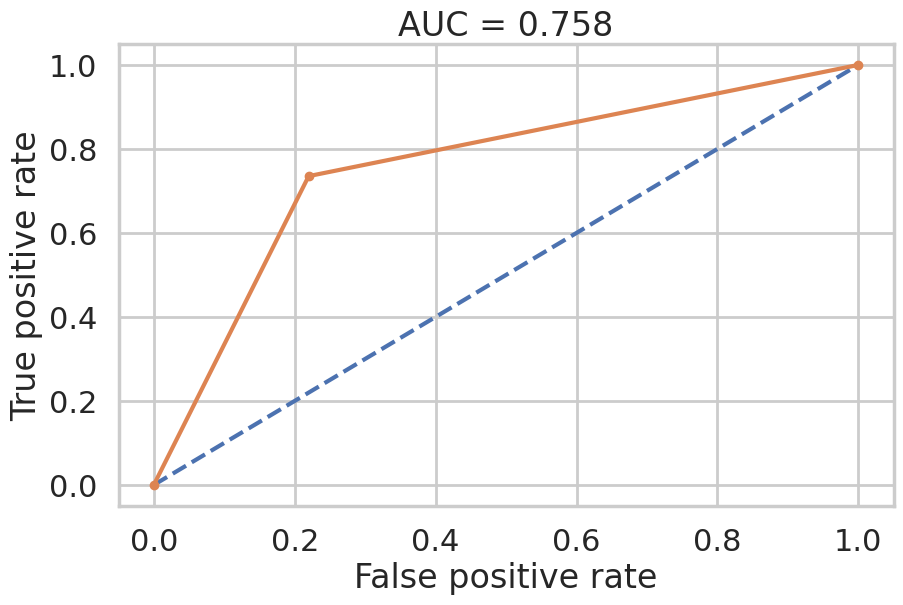

In [103]:
# ROC curve and AUC
probs = tree_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
tree_auc = roc_auc_score(y_test, probs)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(tree_auc,3)}")
plt.show()

# Model Comparison

In [104]:
comparison = pd.DataFrame({
    "Logistic regression":{'Accuracy':log_accuracy, 'AUC':log_auc, 'F1 score':logistic_f1},
    "K-nearest neighbours":{'Accuracy':knn_accuracy, 'AUC':knn_auc, 'F1 score':knn_f1},
    "Decision trees":{'Accuracy':tree_accuracy, 'AUC':tree_auc, 'F1 score':tree_f1}
}).T

In [105]:
comparison

,Accuracy,AUC,F1 score
Logistic regression,0.663311,0.712937,0.627936
K-nearest neighbours,0.804251,0.814332,0.798619
Decision trees,0.760626,0.757708,0.727735


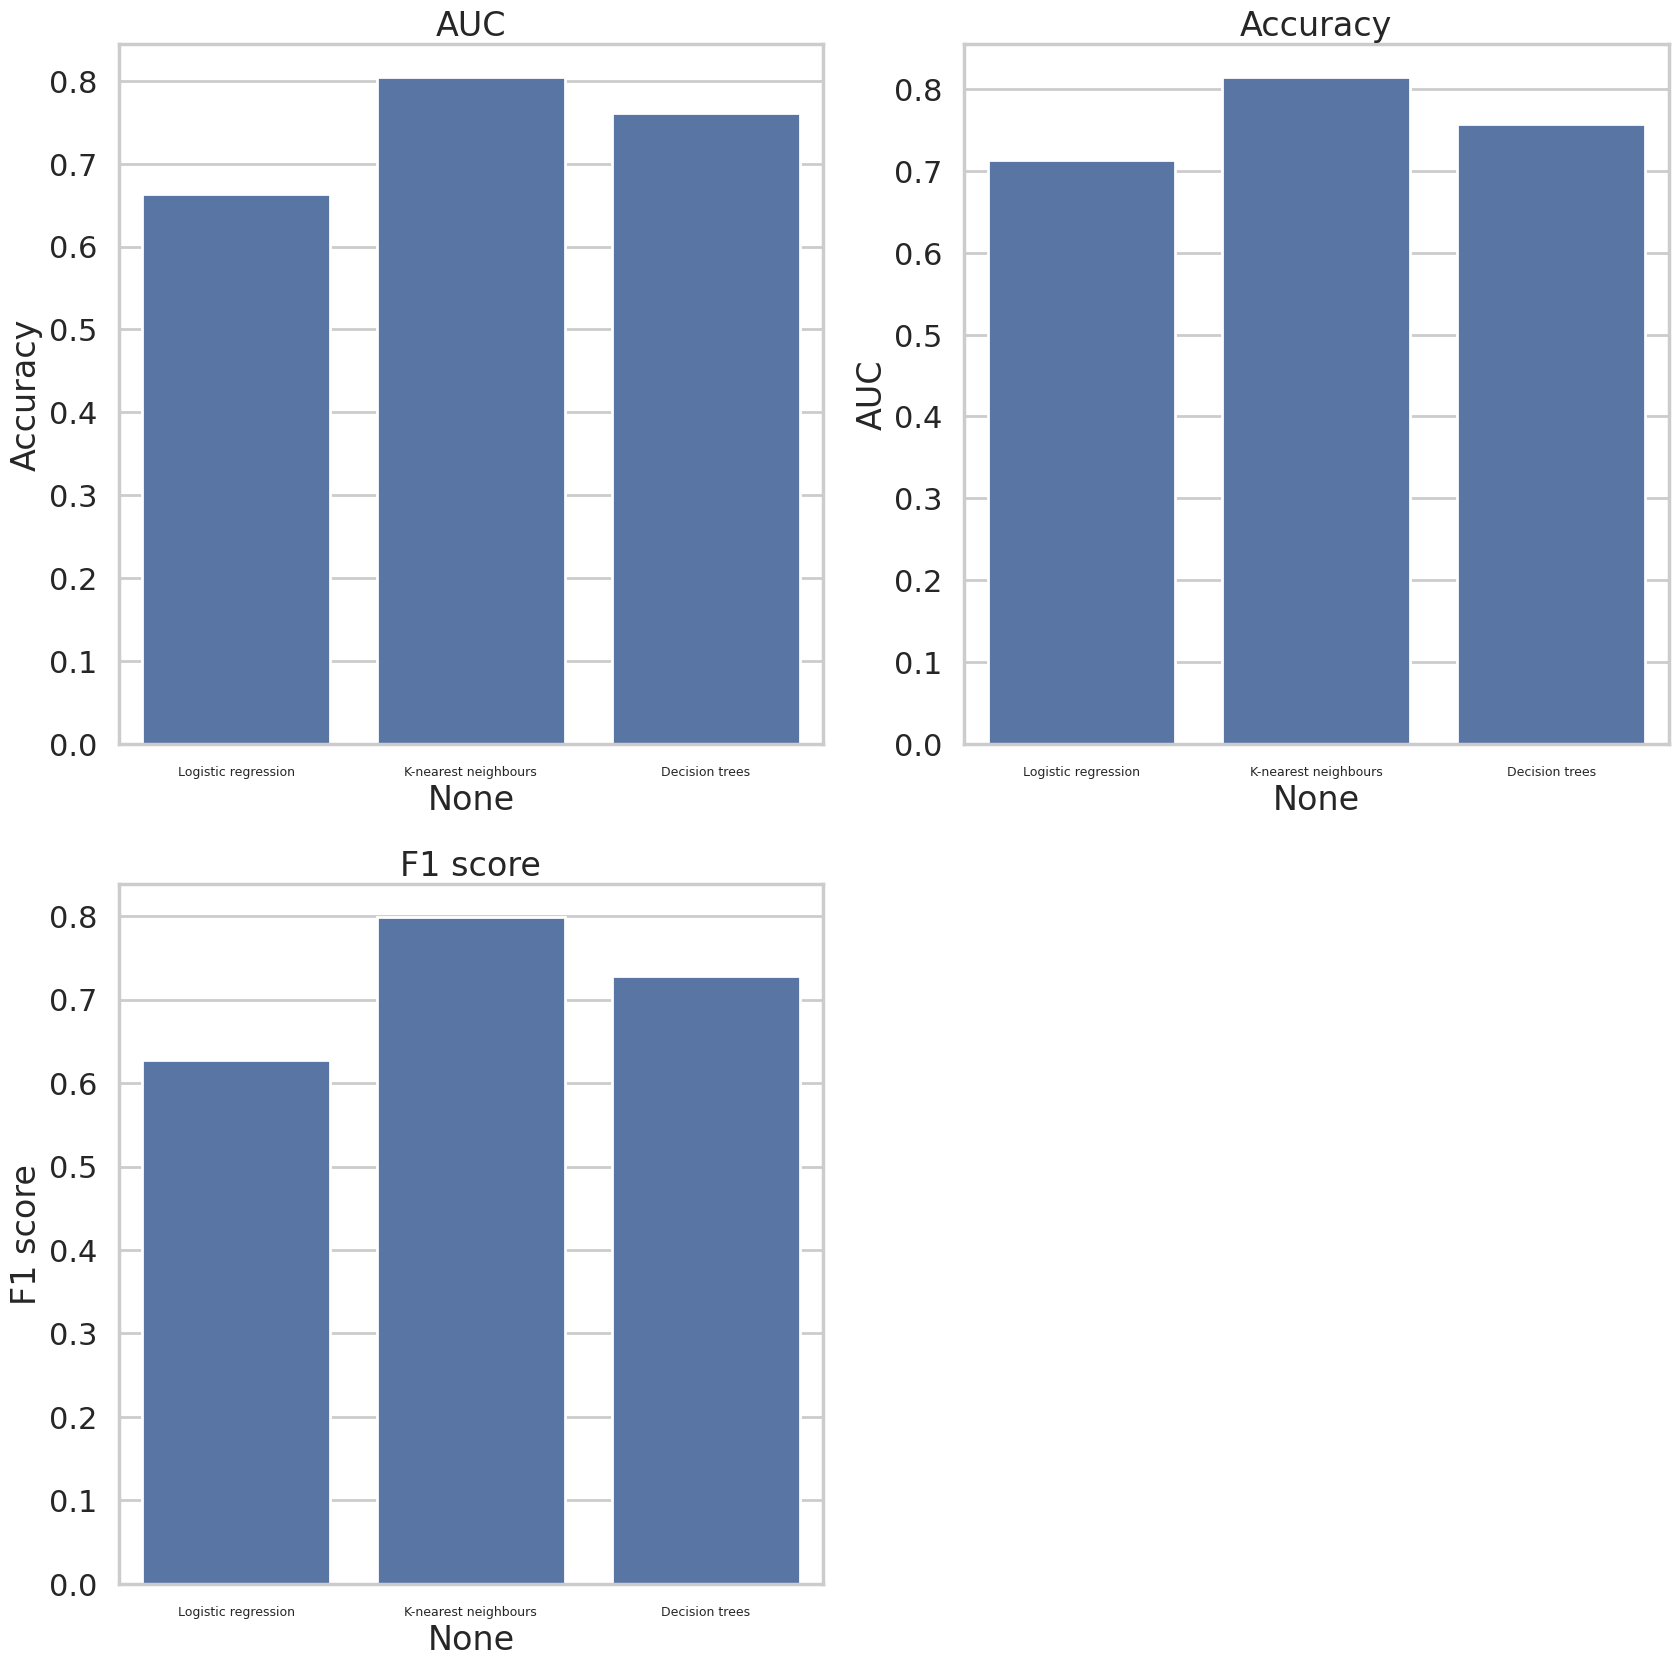

In [106]:
fig = plt.gcf()
fig.set_size_inches(20, 20)
titles = ['AUC','Accuracy','F1 score']
for title,label in enumerate(comparison.columns):
    plt.subplot(2,2,title+1)
    sns.barplot(x=comparison.index, y = comparison[label], data=comparison)
    plt.xticks(fontsize=9)
    plt.title(titles[title])
plt.show()

# insights

1. The pivotal predictors for estimating the ten-year risk of developing Coronary Heart Disease (CHD) were identified as age and systolic blood pressure, signifying their significant role in the predictive model.

2. Among the various machine learning models assessed, the Random Forest Classifier emerged as the top-performing model in terms of both accuracy and the F1 score. Its noteworthy high Area Under the Curve (AUC) underscores its robust true positive rate, making it a favorable choice for this task.

3. The implementation of the Synthetic Minority Oversampling Technique (SMOTE) to balance the dataset yielded notable improvements in the models' sensitivity. This improvement was observed when comparing the performance metrics with those of other models evaluated in separate analyses on the same dataset.

4. It's important to note that, with a larger dataset, particularly an increase in data points for the minority class, the potential for building even more effective models becomes apparent. The availability of additional data can lead to improved model performance and predictive accuracy.


# Conclusion:

In this healthcare-focused project, we harnessed the power of machine learning to extract meaningful insights from medical data. Our primary objective was to develop a predictive model that could assist in health-related decision-making.

After rigorous experimentation with multiple machine learning algorithms, the Random Forest Classifier (RFC) emerged as the standout performer. It achieved an accuracy rate of 87.91%. This signifies that RFC excels in accurately identifying health outcomes, which is crucial for medical professionals and patients alike.

These findings hold immense promise for the healthcare domain. The ability to predict health outcomes with such precision can revolutionize patient care, leading to earlier disease detection, tailored treatment plans, and optimized healthcare resource allocation. It empowers medical practitioners with data-driven insights to make informed decisions, ultimately improving patient well-being.

Beyond healthcare, this project underscores the transformative potential of machine learning across various sectors. By harnessing data, we can drive innovation, enhance decision-making, and contribute to a brighter, healthier future for all.
